In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import missingno as msno
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import time

## Pre-processing

In [7]:
csv = pd.read_csv('lfd_2023_group2test.csv')
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    5000 non-null   int64  
 2   length_cm   5000 non-null   int64  
 3   wavelength  5000 non-null   int64  
 4   country     5000 non-null   object 
 5   cost        5000 non-null   int64  
 6   recoil      5000 non-null   float64
 7   y_offset    5000 non-null   float64
 8   shape       5000 non-null   object 
 9   distance    5000 non-null   float64
 10  target      5000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 429.8+ KB


<Axes: >

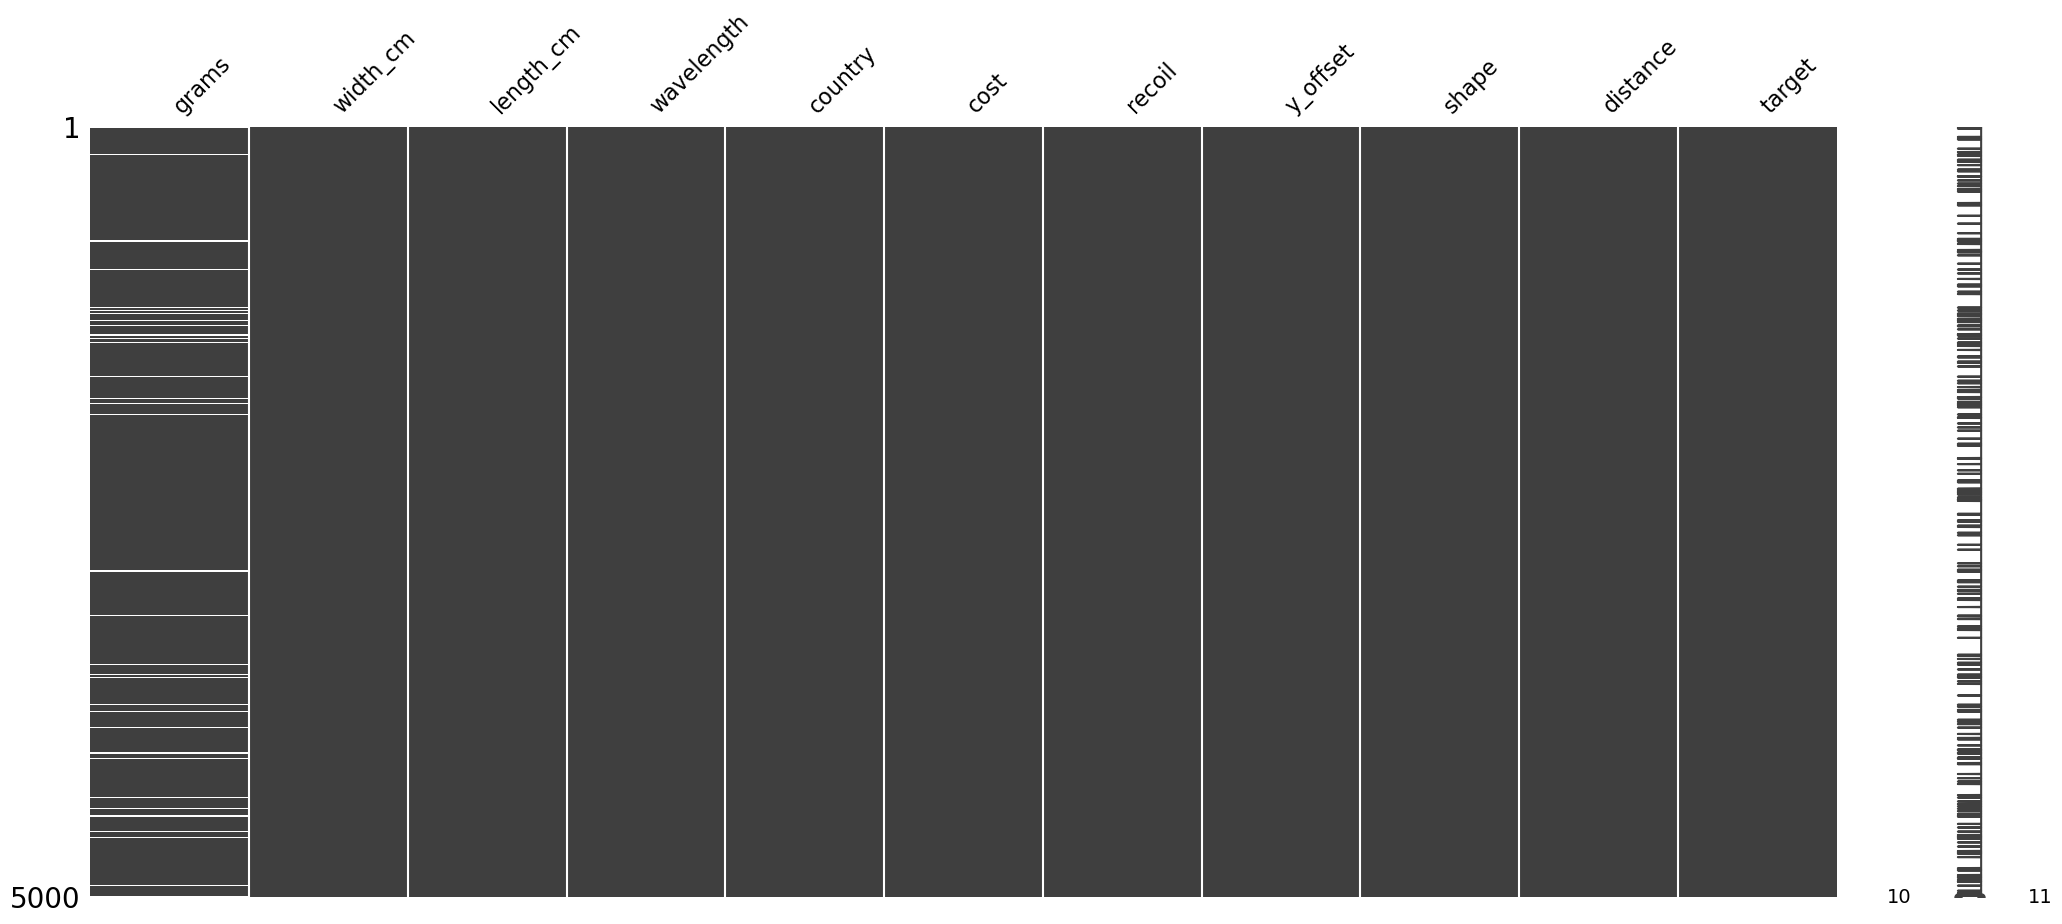

In [8]:
msno.matrix(csv.sample(5000))

<class 'pandas.core.frame.DataFrame'>
Index: 4751 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    4751 non-null   int64  
 2   length_cm   4751 non-null   int64  
 3   wavelength  4751 non-null   int64  
 4   country     4751 non-null   object 
 5   cost        4751 non-null   int64  
 6   recoil      4751 non-null   float64
 7   y_offset    4751 non-null   float64
 8   shape       4751 non-null   object 
 9   distance    4751 non-null   float64
 10  target      4751 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 445.4+ KB


<Axes: >

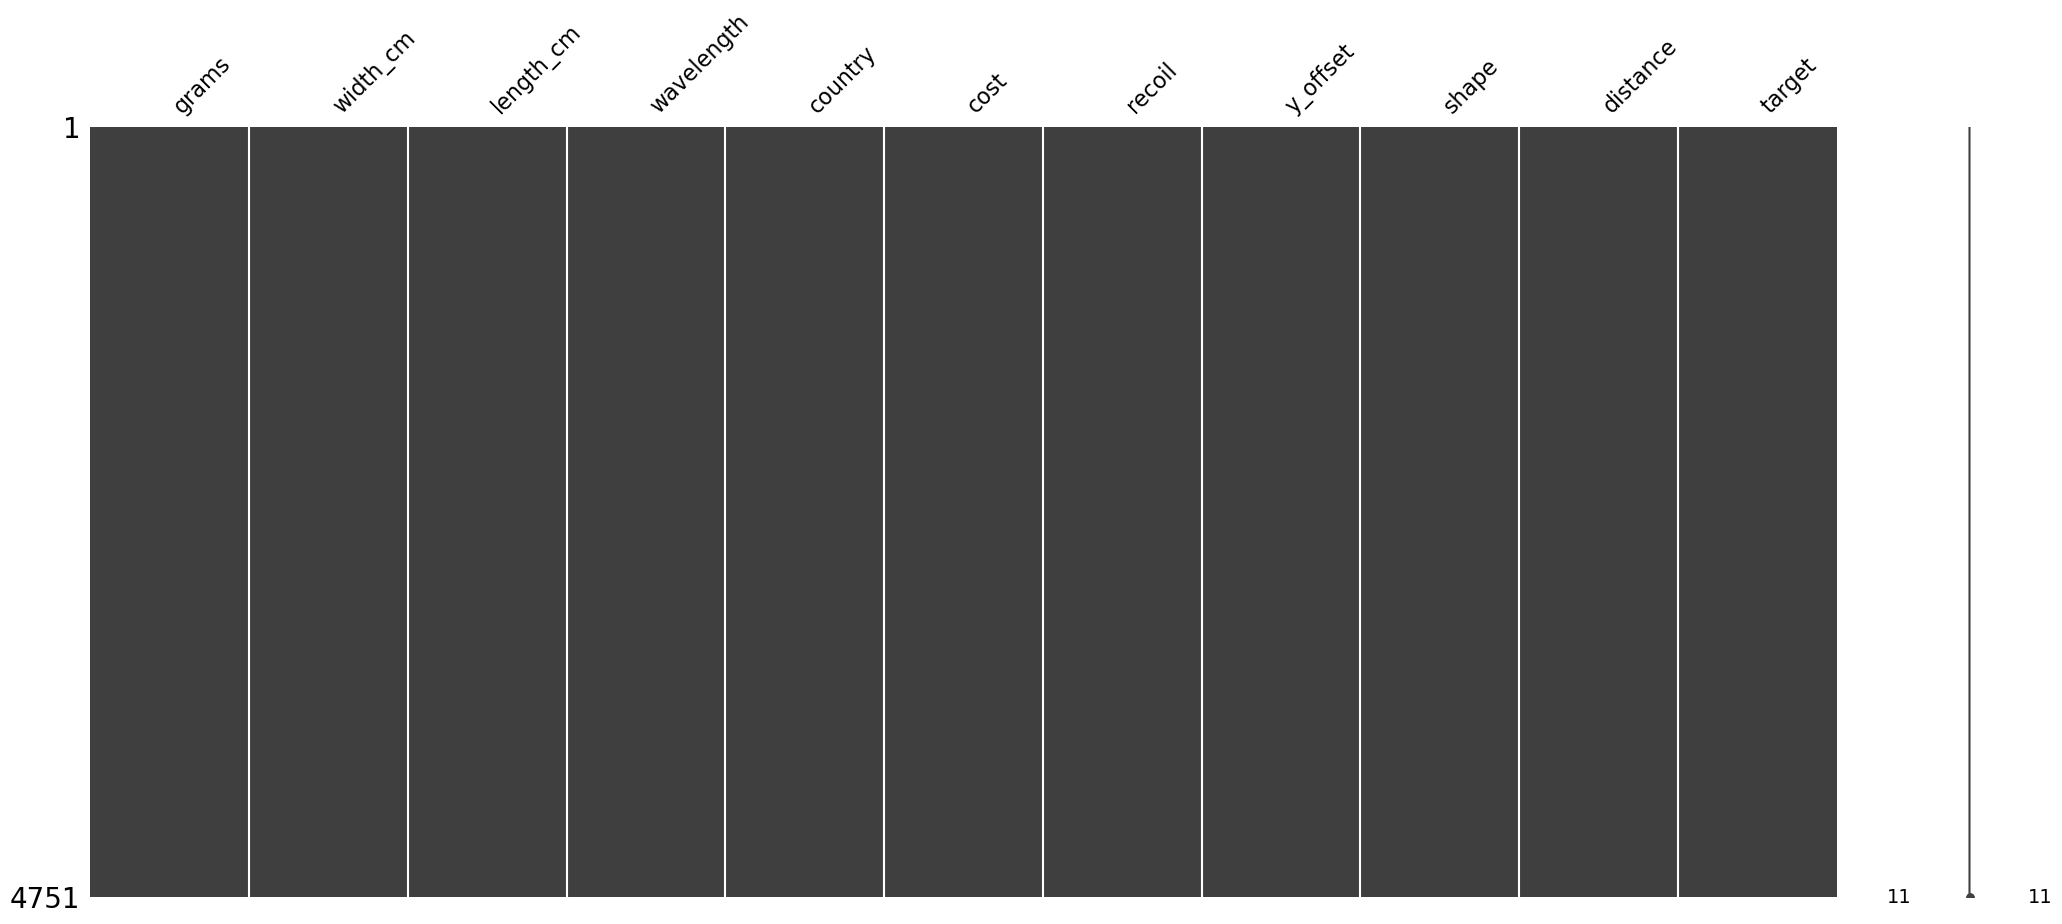

In [9]:
csv2 = csv.dropna()
csv3 = csv2.drop_duplicates()
csv3.info()
msno.matrix(csv3.sample(4751))

In [10]:
X = csv3.iloc[:, :-1].values
y = csv3.iloc[:, -1].values

In [11]:
y

array(['widget7', 'widget1', 'widget5', ..., 'widget4', 'widget2',
       'widget8'], dtype=object)

In [12]:
ct = ColumnTransformer(transformers=[
    ('encoder_4', OneHotEncoder(), [4]),
    ('encoder_8', OneHotEncoder(), [8])
], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print("Number of features after one-hot encoding:", X.shape[1])

Number of features after one-hot encoding: 24


In [13]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([6, 0, 4, ..., 3, 1, 7])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [15]:
X_train

array([[0.0, 0.0, 1.0, ..., 24.09, 20.39, 42.91],
       [0.0, 0.0, 0.0, ..., 52.39, -20.58, 31.67],
       [0.0, 1.0, 0.0, ..., 75.19, 2.58, 48.71],
       ...,
       [1.0, 0.0, 0.0, ..., 62.84, -108.54, 35.36],
       [0.0, 0.0, 0.0, ..., 67.43, 68.0, 53.91],
       [0.0, 0.0, 0.0, ..., 70.82, -79.58, 52.01]], dtype=object)

In [16]:
X_test

array([[0.0, 0.0, 0.0, ..., 68.76, 45.44, 48.03],
       [0.0, 0.0, 0.0, ..., 25.98, -22.3, 36.48],
       [0.0, 0.0, 0.0, ..., 60.24, -4.77, 45.08],
       ...,
       [0.0, 0.0, 0.0, ..., 52.74, -71.7, 35.12],
       [0.0, 0.0, 0.0, ..., 24.01, -59.64, 45.23],
       [0.0, 0.0, 0.0, ..., 37.16, -127.63, 32.64]], dtype=object)

In [17]:
y_train

array([1, 3, 7, ..., 7, 8, 7])

In [18]:
y_test

array([7, 0, 7, 0, 4, 6, 8, 8, 8, 1, 0, 6, 2, 1, 7, 2, 8, 8, 2, 1, 5, 2,
       2, 6, 6, 1, 5, 6, 8, 0, 6, 3, 4, 2, 1, 3, 2, 6, 6, 6, 6, 8, 3, 4,
       0, 8, 3, 2, 2, 0, 8, 4, 5, 3, 8, 3, 6, 6, 5, 6, 6, 6, 2, 3, 7, 3,
       6, 6, 3, 4, 5, 2, 6, 5, 3, 0, 1, 8, 0, 6, 7, 3, 0, 4, 2, 1, 2, 6,
       1, 4, 2, 5, 8, 2, 5, 0, 8, 1, 0, 2, 6, 7, 3, 8, 6, 8, 5, 6, 8, 7,
       1, 0, 1, 2, 4, 8, 2, 8, 0, 2, 2, 1, 8, 7, 2, 5, 4, 3, 6, 1, 3, 0,
       3, 1, 8, 8, 8, 2, 3, 7, 2, 4, 2, 3, 5, 2, 3, 1, 6, 7, 6, 5, 3, 7,
       3, 0, 3, 8, 5, 5, 4, 2, 5, 2, 6, 8, 5, 8, 3, 4, 5, 2, 1, 2, 7, 6,
       0, 0, 0, 2, 7, 0, 7, 5, 4, 8, 2, 7, 5, 0, 0, 8, 8, 2, 3, 3, 5, 2,
       0, 8, 7, 2, 7, 8, 6, 0, 8, 4, 4, 5, 2, 3, 8, 8, 4, 7, 4, 0, 6, 0,
       1, 6, 1, 3, 3, 2, 1, 8, 2, 5, 7, 3, 1, 8, 7, 5, 7, 1, 1, 0, 5, 0,
       5, 0, 4, 4, 6, 5, 6, 5, 8, 3, 8, 8, 4, 6, 5, 2, 2, 3, 2, 7, 0, 7,
       5, 2, 5, 4, 2, 7, 3, 6, 1, 3, 6, 7, 1, 2, 2, 6, 7, 4, 8, 1, 7, 5,
       1, 3, 7, 8, 1, 1, 6, 4, 2, 2, 2, 5, 8, 7, 1,

In [19]:
sc = StandardScaler()
X_train[:, 16:] = sc.fit_transform(X_train[:, 16:])
X_test[:, 16:] = sc.transform(X_test[:, 16:])

In [20]:
X_train

array([[0.0, 0.0, 1.0, ..., -1.3605606964284784, 0.44001644617005986,
        0.3396859375552734],
       [0.0, 0.0, 0.0, ..., 0.4570477288486637, -0.1330944689207881,
        -0.8376167093765304],
       [0.0, 1.0, 0.0, ..., 1.9214107004500358, 0.19088036128433855,
        0.9471908621286248],
       ...,
       [1.0, 0.0, 0.0, ..., 1.1282140908326261, -1.363527373274974,
        -0.45111788667382974],
       [0.0, 0.0, 0.0, ..., 1.4230134785365869, 1.1060113367601325,
        1.4918504496771459],
       [0.0, 0.0, 0.0, ..., 1.640741130893106, -0.9584189500132956,
        1.2928402157651862]], dtype=object)

In [21]:
X_test

array([[0.0, 0.0, 0.0, ..., 1.5084346518800003, 0.7904296368712007,
        0.8759661468338181],
       [0.0, 0.0, 0.0, ..., -1.2391727132562593, -0.1571547758272138,
        -0.33380659089414844],
       [0.0, 0.0, 0.0, ..., 0.9612253309131714, 0.08806451491094991,
        0.5669765731284065],
       ...,
       [0.0, 0.0, 0.0, ..., 0.4795269849916673, -0.8481891718606015,
        -0.4762560214837617],
       [0.0, 0.0, 0.0, ..., -1.3656988121183076, -0.6794872525050821,
        0.5826879073846137],
       [0.0, 0.0, 0.0, ..., -0.5211210456026042, -1.6305688028352445,
        -0.7360167478530563]], dtype=object)

## Kernel SVM (rbf)

In [47]:
rbf=[0.0756, 0.07814, 0.071, 0.076, 0.074]  #train time * 5
start_time = time.time()

model = SVC(kernel = 'rbf', random_state = 1, C=100, gamma = 0.0001)
model.fit(X_train, y_train)

rbf_time = time.time() - start_time

print('Training completed.   The train time of SVM rbf is: ' , rbf_time)

Training completed.   The train time of SVM rbf is:  0.0799875259399414


In [48]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7. 7.]
 [0. 0.]
 [7. 7.]
 ...
 [4. 4.]
 [6. 6.]
 [0. 0.]]


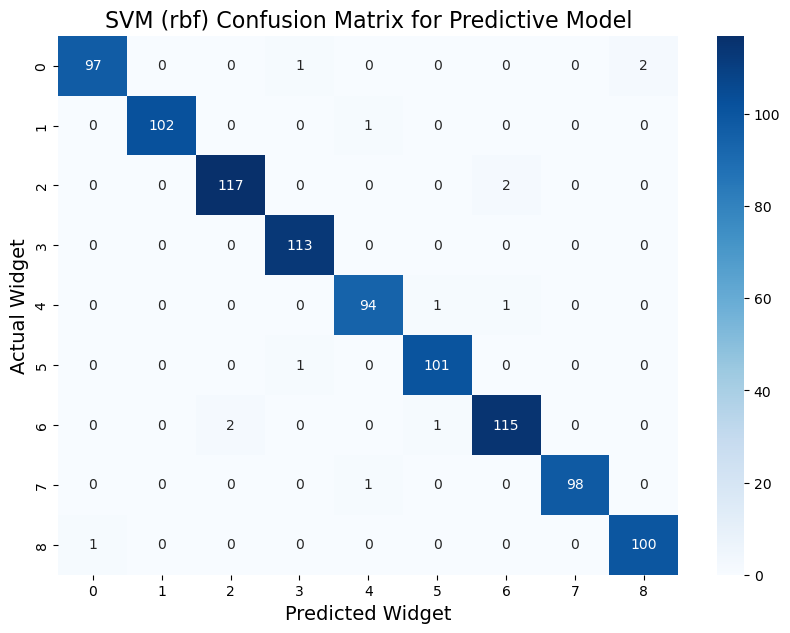

0.9852786540483701

In [49]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('SVM (rbf) Confusion Matrix for Predictive Model', fontsize=16)
plt.ylabel('Actual Widget', fontsize=14)
plt.xlabel('Predicted Widget', fontsize=14)
plt.show()

accuracy_score(y_test, y_pred)

In [33]:
rbf_gridtime=[20.101, 19.8311, 19.625, 19.8626, 19.806]

start_time = time.time()
model = SVC(kernel='rbf',random_state=1)

parameters = {
              'C': [0.1, 1, 100, 1000],
              'gamma': [0.0001, 0.001, 0.1, 1, 3, 5]
             }
gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
gridsearch.fit(X_train, y_train)

rbf_grid_time = time.time() - start_time

print("the grid time of RBF kernel is: ", rbf_gridtime)

the grid time of RBF kernel is:  [20.101, 19.8311, 19.625, 19.8626, 19.806]


In [22]:
gridsearch.best_params_

{'C': 100, 'gamma': 0.0001}

## Kernel SVM (Poly)

In [23]:
polytime=[0.0695, 0.0752, 0.0708, 0.069, 0.062]
start_time = time.time()

model = SVC(C=1, kernel='poly', random_state = 1)
model.fit(X_train, y_train)

poly_time = time.time() - start_time
print('Training completed.   The train time of SVM Poly is: ' , poly_time)

Training completed.   The train time of SVM Poly is:  0.06408071517944336


In [24]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


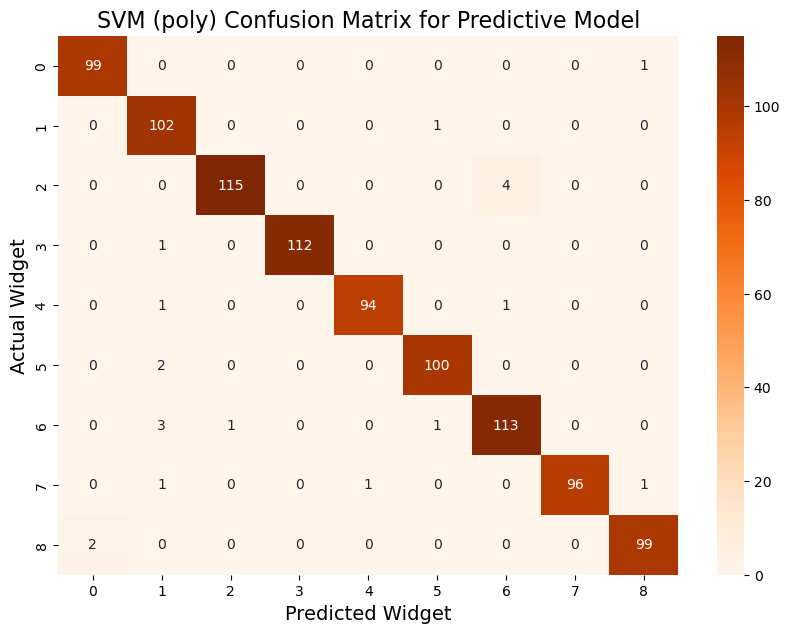

0.9779179810725552

In [25]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')
plt.title('SVM (poly) Confusion Matrix for Predictive Model', fontsize=16)
plt.ylabel('Actual Widget', fontsize=14)
plt.xlabel('Predicted Widget', fontsize=14)
plt.show()

accuracy_score(y_test, y_pred)



In [32]:
model = SVC(kernel='poly',random_state=1)

ir=range(1, 6)
polygridtime=[1.361783504486084, 1.3541688919067383, 1.3621025085449219, 1.3611788749694824, 1.3609387874603271]


for i in ir:
    start_time = time.time()
    parameters = {
                'C': [0.1, 1, 100, 1000],
                }
    gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
    gridsearch.fit(X_train, y_train)

    poly_grid_time = time.time() - start_time
    polygridtime.append(poly_grid_time)

print("and the grid time of poly kernel is:", poly_grid_time)

and the grid time of poly kernel is: 1.381664514541626


In [27]:
gridsearch.best_params_

{'C': 1}

## Kernel SVM (linear)

In [22]:
linear = []
ir=range(1, 6)
linear_store=[0.03, 0.029, 0.0289, 0.029, 0.0291]

for i in ir:
    start_time = time.time()
    model = SVC(C=0.1, kernel='linear', random_state = 1)
    model.fit(X_train, y_train)
    linear_time = time.time() - start_time
    linear.append(linear_time)

print('Training has done 5 times in a row.   All 5 train times of SVM linear is: ' , linear)


Training has done 5 times in a row.   All 5 train times of SVM linear is:  [0.03300070762634277, 0.03600049018859863, 0.030998706817626953, 0.03101968765258789, 0.031998395919799805]


In [35]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


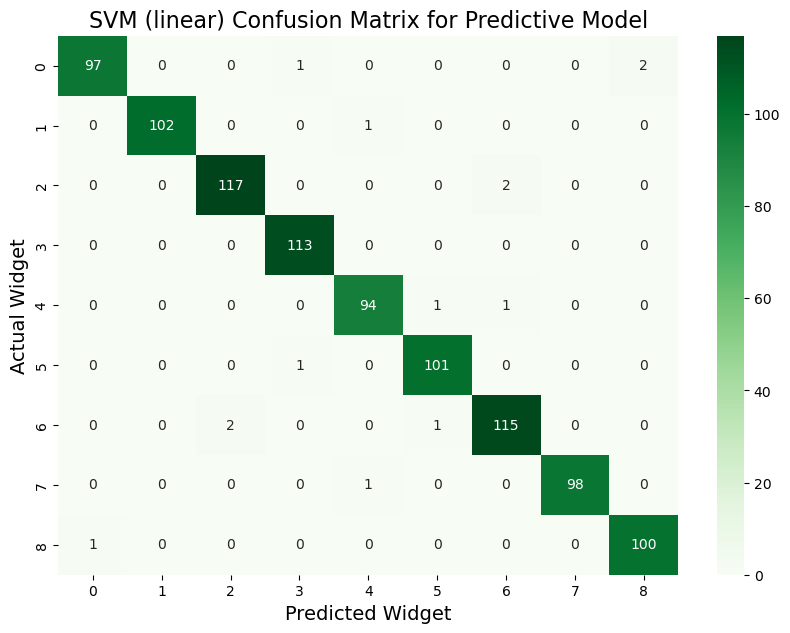

0.9852786540483701

In [51]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title('SVM (linear) Confusion Matrix for Predictive Model', fontsize=16)
plt.ylabel('Actual Widget', fontsize=14)
plt.xlabel('Predicted Widget', fontsize=14)
plt.show()

accuracy_score(y_test, y_pred)

In [38]:
linear_grid=[]
ir=range(1, 6)
linear_grid_store=[0.9889, 1.0167, 1.0831, 1.0691, 1.0678]

model = SVC(kernel='linear',random_state=1)

for i in ir:
    start_time = time.time()

    parameters = {
                'C': [0.1, 1, 10, 100, 1000],
                }
    gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
    gridsearch.fit(X_train, y_train)
    linear_grid_time = time.time() - start_time
    linear_grid.append(linear_grid_time)

print("the grid time of linear kernel is: ", linear_grid_store)
    

the grid time of linear kernel is:  [0.9889, 1.0167, 1.0831, 1.0691, 1.0678]


In [39]:
gridsearch.best_params_

{'C': 0.1}

## Neural Network

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [72]:
neuralModel = Sequential()
neuralModel.add(Dense(16, activation='relu', input_shape=(24,)))

neuralModel.add(Dense(16, activation='relu'))
neuralModel.add(BatchNormalization())
neuralModel.add(Dense(16, activation='relu'))
neuralModel.add(BatchNormalization())

neuralModel.add(Dropout(rate=0.3))
neuralModel.add(Dense(9, activation='softmax'))

neuralModel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                400       
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_15 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_16 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dropout_6 (Dropout)         (None, 16)               

In [73]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)

(3800, 24) float32
(3800,) float32
(951, 24) float32
(951,) float32


In [80]:
NNtraintime = [4.0666]

start_time = time.time()

neuralModel.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
neuralModel.fit(x=X_train, y=y_train, batch_size=32,validation_split=0.20, epochs=20)

neural_train_time = time.time()-start_time

print("total training time = ", neural_train_time, "seconds")

Epoch 1/20
95/95 [==============================] - 1s 3ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.1677 - val_accuracy: 0.9697
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9901 - val_loss: 0.1536 - val_accuracy: 0.9750
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9924 - val_loss: 0.1675 - val_accuracy: 0.9684
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.1727 - val_accuracy: 0.9711
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9905 - val_loss: 0.1613 - val_accuracy: 0.9684
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9921 - val_loss: 0.1311 - val_accuracy: 0.9789
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9898 - val_loss: 0.1669 - val_accuracy: 0.9737
Epoch 8/20
95/95 [==

In [78]:
y_nerualPrediction = neuralModel.predict(X_test)

y_nerualPrediction = np.argmax(y_nerualPrediction, axis=1)
print(classification_report(y_nerualPrediction, y_test))

30/30 [==============================] - 0s 967us/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        95
           1       0.97      0.98      0.98       102
           2       0.97      0.98      0.98       118
           3       0.99      0.98      0.99       114
           4       1.00      0.98      0.99        98
           5       0.99      0.99      0.99       102
           6       0.96      0.94      0.95       120
           7       0.97      0.98      0.97        98
           8       0.99      0.96      0.98       104

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



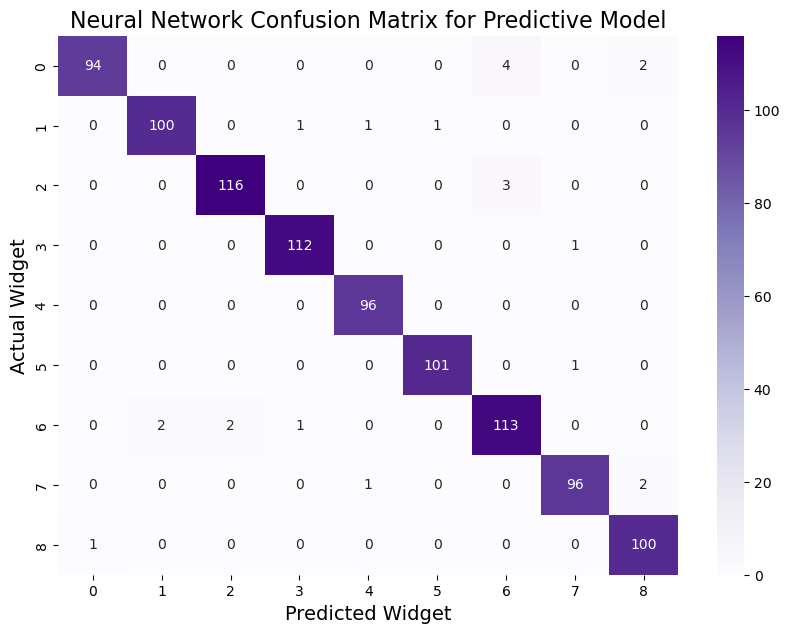

the accuracy of Neural Network is: 0.9758149316508938


In [79]:
cm = confusion_matrix(y_test, y_nerualPrediction)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g')
plt.title('Neural Network Confusion Matrix for Predictive Model', fontsize=16)
plt.ylabel('Actual Widget', fontsize=14)
plt.xlabel('Predicted Widget', fontsize=14)
plt.show()

print("the accuracy of Neural Network is:", accuracy_score(y_test, y_nerualPrediction))

In [82]:
batchsize_choice=[16,32,64]
epochs_choice=[5,10,20]
learningrate_choice=[0.001, 0.01, 0.1]
show = []

for learning_rate in learningrate_choice:
    for epochs in epochs_choice:
        for batch_size in batchsize_choice:
            start_time = time.time()

            neuralModel = Sequential()
            neuralModel.add(Dense(16, activation='relu', input_shape=(24,)))

            neuralModel.add(Dense(16, activation='relu'))
            neuralModel.add(BatchNormalization())
            neuralModel.add(Dense(16, activation='relu'))
            neuralModel.add(BatchNormalization())

            neuralModel.add(Dropout(rate=0.3))
            neuralModel.add(Dense(9, activation='softmax'))
            neuralModel.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            neuralModel.fit(x=X_train, y=y_train, batch_size=batch_size, validation_split=0.20, epochs=epochs)
            accuracy = neuralModel.evaluate(X_train, y_train)
            T_time = time.time() - start_time

            show.append({
                "learning rate": learning_rate,
                "batch size": batch_size,
                "epochs": epochs,
                "accuracy": accuracy,
                "training time": T_time
            })

Epoch 1/5
190/190 [==============================] - 1s 2ms/step - loss: 1.7425 - accuracy: 0.3757 - val_loss: 1.3827 - val_accuracy: 0.6776
Epoch 2/5
190/190 [==============================] - 0s 2ms/step - loss: 1.0319 - accuracy: 0.6747 - val_loss: 0.6211 - val_accuracy: 0.8697
Epoch 3/5
190/190 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.7987 - val_loss: 0.3326 - val_accuracy: 0.9276
Epoch 4/5
190/190 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.8533 - val_loss: 0.2370 - val_accuracy: 0.9474
Epoch 5/5
119/119 [==============================] - 0s 950us/step - loss: 0.1578 - accuracy: 0.9621
Epoch 1/5
95/95 [==============================] - 1s 3ms/step - loss: 2.3471 - accuracy: 0.2211 - val_loss: 1.8764 - val_accuracy: 0.4263
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 1.3846 - accuracy: 0.5181 - val_loss: 1.2909 - val_accuracy: 0.7184
Epoch 3/5
95/95 [==============================] - 0s 2ms

In [83]:
showdf = pd.DataFrame(show)
print(showdf)

    learning rate  batch size  epochs  \
0           0.001          16       5   
1           0.001          32       5   
2           0.001          64       5   
3           0.001          16      10   
4           0.001          32      10   
5           0.001          64      10   
6           0.001          16      20   
7           0.001          32      20   
8           0.001          64      20   
9           0.010          16       5   
10          0.010          32       5   
11          0.010          64       5   
12          0.010          16      10   
13          0.010          32      10   
14          0.010          64      10   
15          0.010          16      20   
16          0.010          32      20   
17          0.010          64      20   
18          0.100          16       5   
19          0.100          32       5   
20          0.100          64       5   
21          0.100          16      10   
22          0.100          32      10   
23          0.10

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

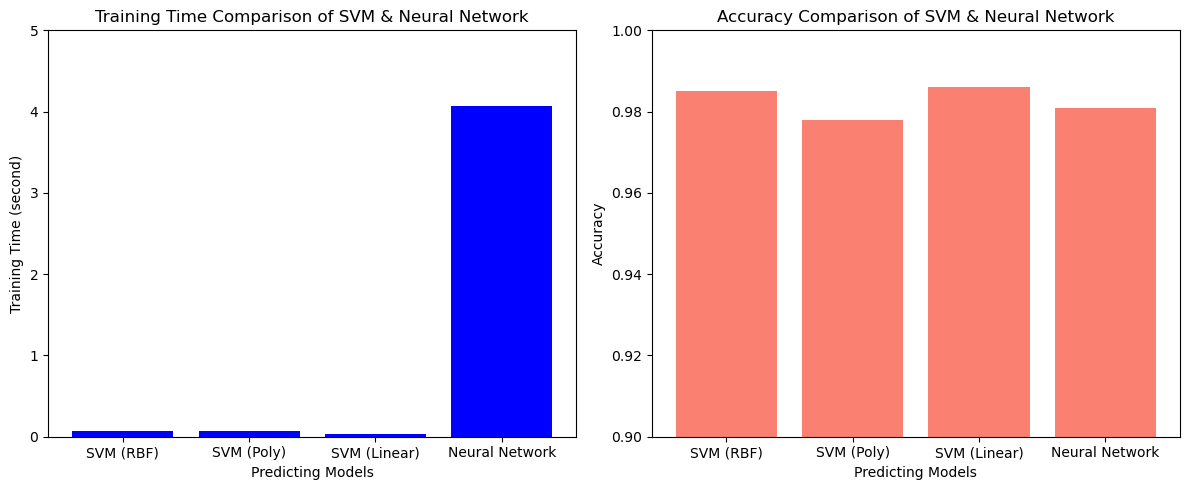

In [37]:
# Data for plotting
models = ['SVM (RBF)', 'SVM (Poly)', 'SVM (Linear)', 'Neural Network']
training_times = [0.074948, 0.0693, 0.0292, 4.0666]
accuracies = [0.985, 0.978, 0.986, 0.981]

# Creating subplots for training times and accuracies
fig, (Ttime, Acc) = plt.subplots(1, 2, figsize=(12, 5))

Ttime.bar(models, training_times, color='blue')
Ttime.set_title('Training Time Comparison of SVM & Neural Network')
Ttime.set_ylabel('Training Time (second)')
Ttime.set_xlabel('Predicting Models')
Ttime.set_ylim(0.0, 5.0)

Acc.bar(models, accuracies, color='salmon')
Acc.set_title('Accuracy Comparison of SVM & Neural Network')
Acc.set_ylabel('Accuracy')
Acc.set_xlabel('Predicting Models')
Acc.set_ylim(0.9, 1.0)

# Displaying the plots
plt.tight_layout()
plt.show()

Epoch 1/20
95/95 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9964 - val_loss: 0.1040 - val_accuracy: 0.9776
Epoch 2/20
95/95 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.1104 - val_accuracy: 0.9750
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9934 - val_loss: 0.1226 - val_accuracy: 0.9763
Epoch 4/20
95/95 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9895 - val_loss: 0.0888 - val_accuracy: 0.9776
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.1381 - val_accuracy: 0.9750
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9947 - val_loss: 0.0946 - val_accuracy: 0.9803
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.1234 - val_accuracy: 0.9776
Epoch 8/20
95/95 [==

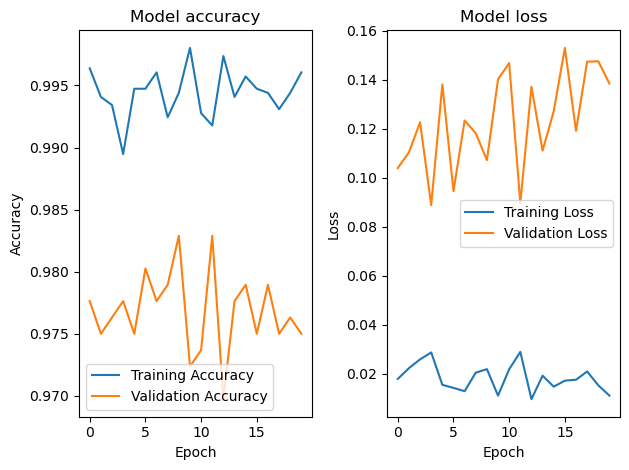

In [40]:
neuralModel_history = neuralModel.fit(x=X_train, y=y_train, batch_size=32, validation_split=0.20, epochs=20)
plt.subplot(1, 2, 1)
plt.plot(neuralModel_history.history['accuracy'], label='Training Accuracy')
plt.plot(neuralModel_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(neuralModel_history.history['loss'], label='Training Loss')
plt.plot(neuralModel_history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()